<a href="https://colab.research.google.com/github/AlyaMarliza13/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.	Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut

In [22]:
!pip install pytesseract

In [23]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.	Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

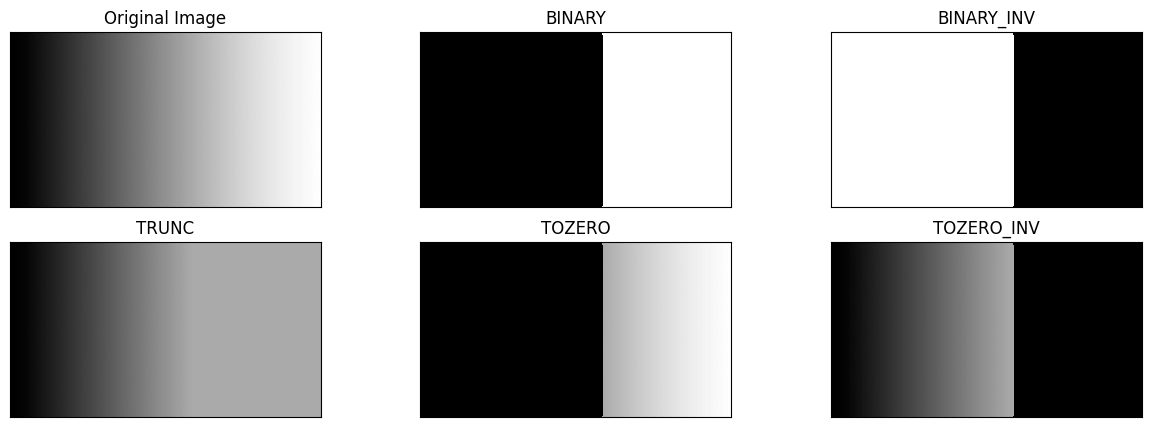

In [24]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255                                        #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1

#3. Threshold Truncate
thresh3[img>thresh] = thresh                                     #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0                                         #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0                                          #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


4.	Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

141


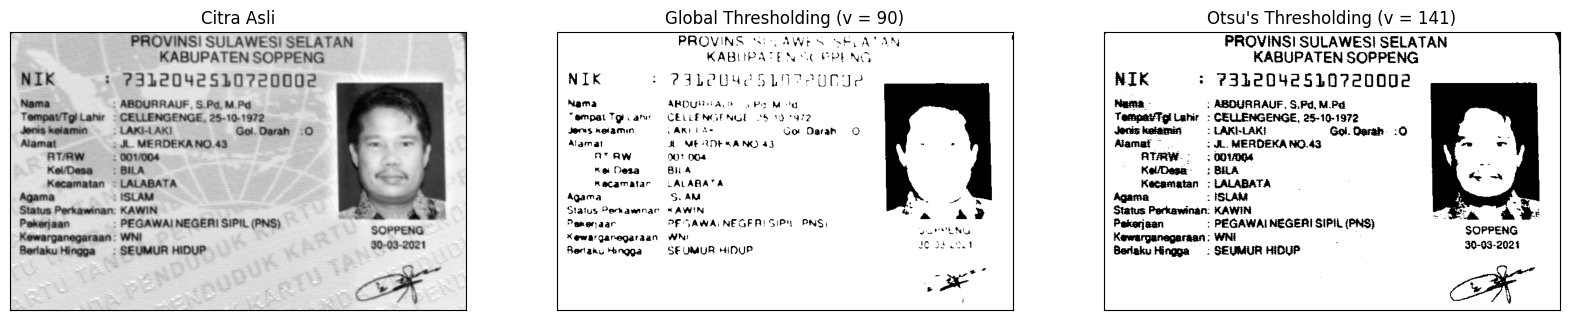

In [25]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img, (5, 5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ") + str(otsu_thresh)+")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

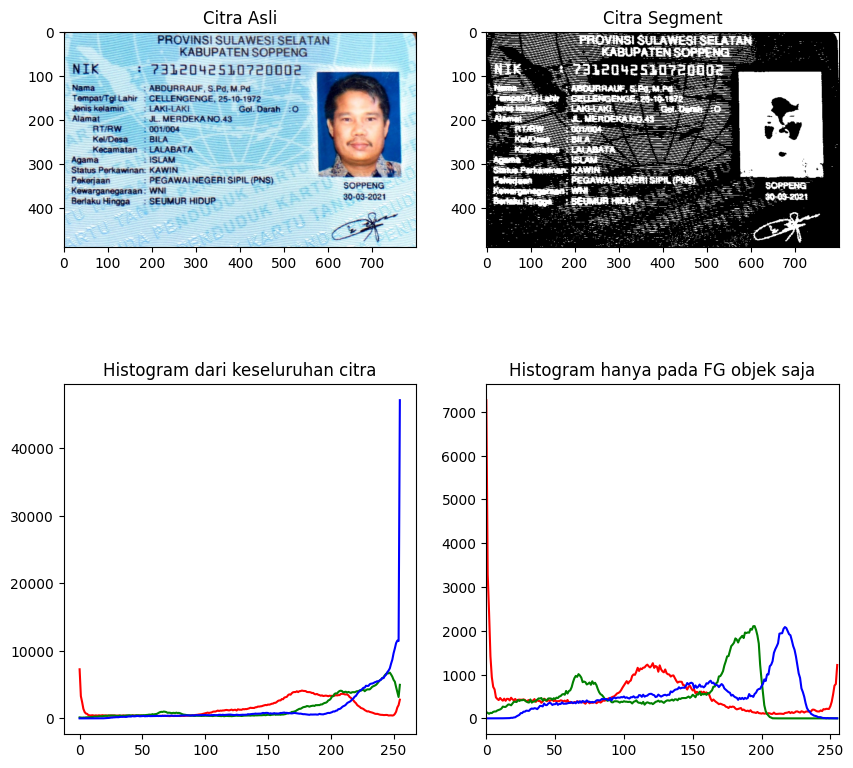

In [26]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()


6.	Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7958a48ab280>)

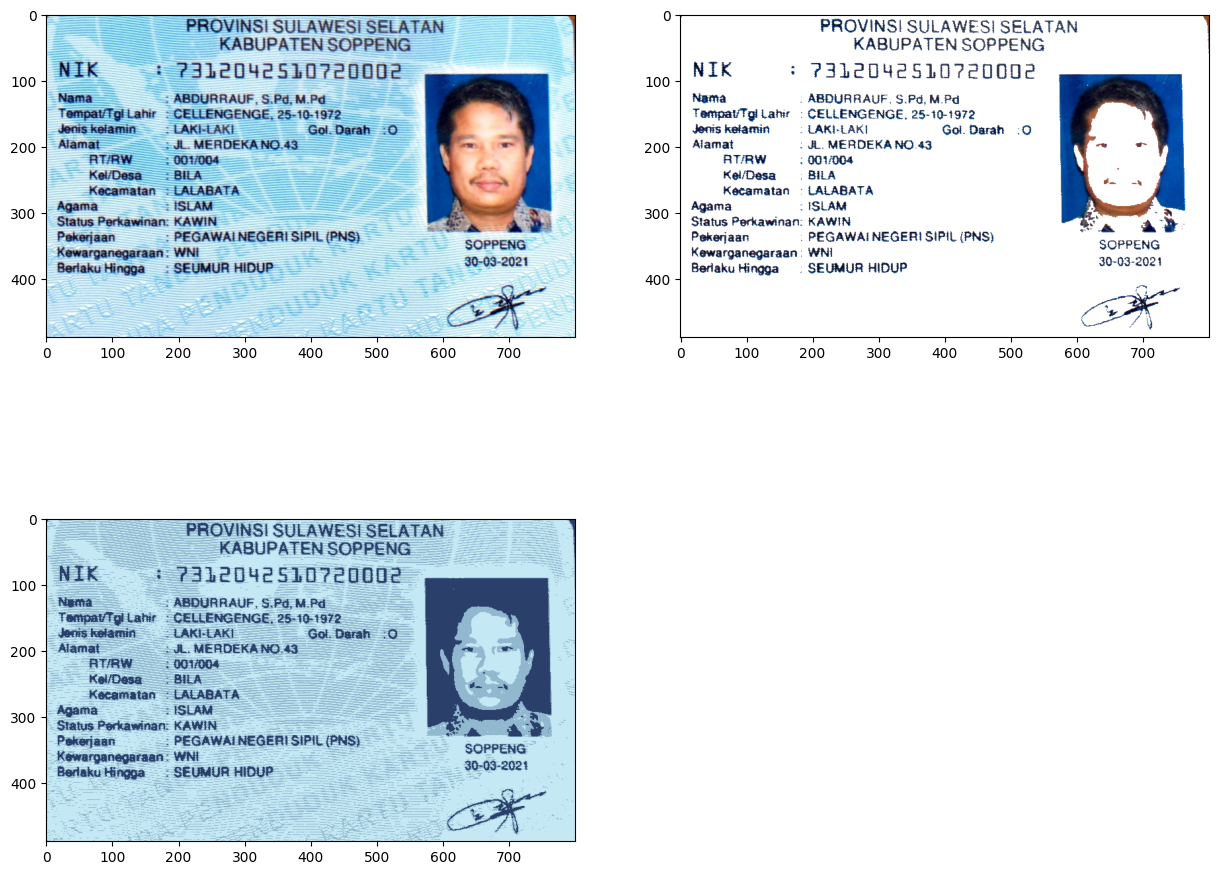

In [27]:
Filename = ('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)


**E.	Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**
1.	Install PIP OCR


In [28]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


2.	Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [29]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


3.	Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [31]:
import cv2
from pytesseract import Output

img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4.	Menambahkan kotak untuk deteksi teksi pada gambar

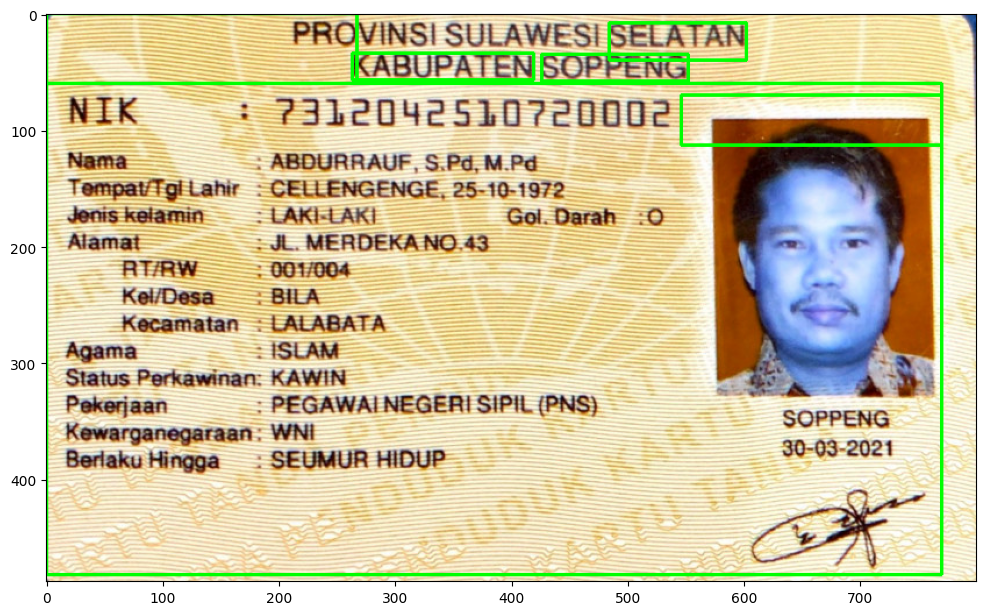

In [32]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i],
                        d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)


5.	Hasil pembacaan KTP Menjadi text

NIK

Nama
Tempat/Tgi Lahir
Jenis kelamin
Alamat
RTRW
Kei/Desa
Kecamatan
Agama
Status Perkawinan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

1 001/004

PROVINSI SULAWESI SELATAN
KABUPATEN SOPPENG

?31001420510720002

ABDURRAUF. S.Pd, M.Pd
CELLENGENGE. 25-10-1972
LAKI-LAKI Gol. Darah .O
JL. MERDEKA NO.43

BILA

LALABATA

ISLAM

KAWIN

PEGAWAI NEGERI SIPIL (PNS)
WNI

 

aa
SOPPENG

SEUMUR HIDUP 30-03-2021

TK
——

 



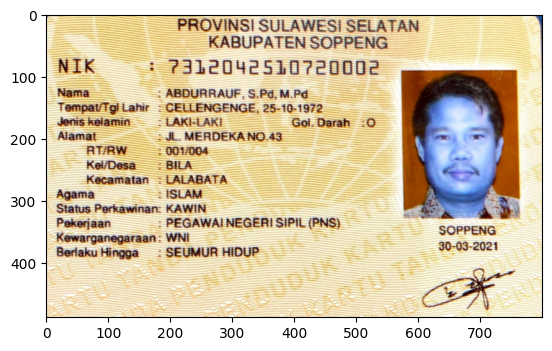

In [33]:
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()


F.	Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan  GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

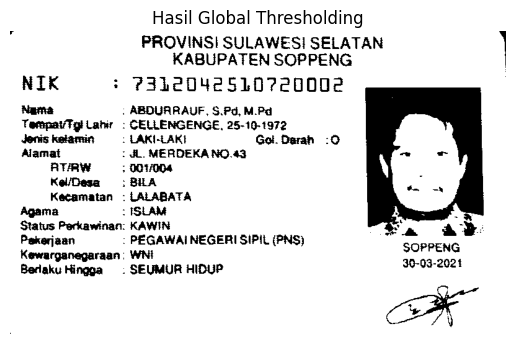

In [34]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar KTP
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/KTP.jpg', 0)  # Baca dalam mode grayscale

# Lakukan Global Thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)



# Tampilkan gambar setelah thresholding
plt.imshow(thresh, cmap='gray')
plt.title('Hasil Global Thresholding')
plt.axis('off')
plt.show()

In [35]:
import pytesseract

# Konversi hasil thresholding ke format yang bisa dibaca Tesseract (dalam bentuk string)
text = pytesseract.image_to_string(thresh)

# Tampilkan teks yang terbaca
print("Teks yang terbaca dari KTP 1:")
print(text)

Teks yang terbaca dari KTP 1:
PROVINS! SULAWES! SELATAN

KABUPATEN SOPPENG
NIK + F3Le04e2S1,072000e
Nama ; ABDURRAUF, S.Pd,M.Pd
Teropai/Tg Lahir : CELLENGENGE, 25-10-1972
Jonis ketamin 2 LAKI-LAKE Gol. Darah ©
Alamat :uL. MERDEKA NO.43
ATW >» OO10D4

Kel/Desa =: BLA
Kecamatan - LALABATA

   

Agama 7 ISLAM 4 bs e
Status Perkawinan: KAWIN oe. lhUk
Pekerjaan : PEGAWAINEGERI SIPIL (PNS) SOPPENG

Kewarganegaraan: WN

Beraku Hingga «=. SEYMUR HIDUP 30-03-2021

ae ae

